# Сортировка данных 

In [3]:
import pandas as pd 
import numpy as np

amazon_df = pd.read_csv('amz_uk_processed_data.csv')

In [4]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


In [5]:
amazon_df.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'isBestSeller', 'boughtInLastMonth', 'categoryName'],
      dtype='object')

In [6]:
amazon_df.columns = ['asin', 'title', 'imageUrl', 'productUrl', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'categoryName']
amazon_df.columns

Index(['asin', 'title', 'imageUrl', 'productUrl', 'stars', 'reviews', 'price',
       'isBestSeller', 'boughtInLastMonth', 'categoryName'],
      dtype='object')

In [7]:
amazon_df.isnull().sum()

asin                 0
title                0
imageUrl             0
productUrl           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

In [8]:
amazon_df.duplicated().sum()

0

In [9]:
pd.set_option('display.max_colwidth', None) #Введем для полного просмотра данных

def extract_main_characteristics(title):
    # Разделяем название товара по разделителю ' | '
    parts = title.split('|')
    # Основные характеристики - это первая часть
    main_characteristics = parts[0].strip()
    return main_characteristics

# Создаем новый столбец с основными характеристиками товара
amazon_df['mainCharacteristics'] = amazon_df['title'].apply(extract_main_characteristics)

amazon_df.head(3)

,asin,title,imageUrl,productUrl,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,mainCharacteristics
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal",https://m.media-amazon.com/images/I/71C3lbbeLsL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release)"
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home",https://m.media-amazon.com/images/I/61c5rSxwP0L._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home"
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Deep Sea Blue",https://m.media-amazon.com/images/I/61j3SEUjMJL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release)"


In [10]:
amazon_df.shape[0]

2222742

In [11]:
# Удалим дубликаты 
df_without_duplicates = amazon_df.drop_duplicates(subset=['mainCharacteristics'])
df_without_duplicates = df_without_duplicates.reset_index(drop=True)
df_without_duplicates.head()

,asin,title,imageUrl,productUrl,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,mainCharacteristics
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal",https://m.media-amazon.com/images/I/71C3lbbeLsL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release)"
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home",https://m.media-amazon.com/images/I/61c5rSxwP0L._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home"
2,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 release) | Bigger vibrant sound Wi-Fi and Bluetooth smart speaker and Alexa | Cloud Blue",https://m.media-amazon.com/images/I/71yf6yTNWSL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers,"Echo Dot with clock (5th generation, 2022 release)"
3,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal,https://m.media-amazon.com/images/I/613dEoF9-rL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers,Introducing Echo Pop
4,B01MTB55WH,"Anker Soundcore 2 Portable Bluetooth Speaker with 12W Stereo Sound, BassUp, IPX7 Waterproof, 24-Hour Playtime, Wireless Stereo Pairing, Speaker for Home, Outdoors, Travel",https://m.media-amazon.com/images/I/617DcBehCqL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B01MTB55WH,4.7,103673,39.99,False,0,Hi-Fi Speakers,"Anker Soundcore 2 Portable Bluetooth Speaker with 12W Stereo Sound, BassUp, IPX7 Waterproof, 24-Hour Playtime, Wireless Stereo Pairing, Speaker for Home, Outdoors, Travel"


In [12]:
df_without_duplicates.shape[0]

2057135

In [13]:
# На предыдущем шаге мы удалили лишь часть дубликатов, поскольку не во всех товарах есть разделитель '|', 
# для этого создадим столбец с обрезанными записями
df_without = df_without_duplicates.copy()
df_without['halfCharacteristics'] = df_without['mainCharacteristics'].apply(lambda x: x[:len(x)//2])
df_without.head(3)

,asin,title,imageUrl,productUrl,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,mainCharacteristics,halfCharacteristics
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal",https://m.media-amazon.com/images/I/71C3lbbeLsL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release)",Echo Dot (5th gener
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home",https://m.media-amazon.com/images/I/61c5rSxwP0L._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth Range, Wireless Speaker with Enhanced Bass, Noise-Cancelling Microphone, for Outdoor, Travel, Home","Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth R"
2,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 release) | Bigger vibrant sound Wi-Fi and Bluetooth smart speaker and Alexa | Cloud Blue",https://m.media-amazon.com/images/I/71yf6yTNWSL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers,"Echo Dot with clock (5th generation, 2022 release)",Echo Dot with clock (5th


In [14]:
pd.reset_option('display.max_colwidth', None)

In [15]:
df_without['halfCharacteristics'] = df_without['halfCharacteristics'].str.lower()

df_without = df_without.drop_duplicates(subset=['halfCharacteristics'])
df_without = df_without.reset_index(drop=True)

In [16]:
df_without.shape[0]

1902014

In [17]:
df_without.drop(columns = 'halfCharacteristics')

,asin,title,imageUrl,productUrl,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,mainCharacteristics
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release)"
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth..."
2,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers,"Echo Dot with clock (5th generation, 2022 rele..."
3,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers,Introducing Echo Pop
4,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,https://m.media-amazon.com/images/I/617DcBehCq...,https://www.amazon.co.uk/dp/B01MTB55WH,4.7,103673,39.99,False,0,Hi-Fi Speakers,Anker Soundcore 2 Portable Bluetooth Speaker w...
...,...,...,...,...,...,...,...,...,...,...,...
1902009,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",https://m.media-amazon.com/images/I/61ycPU7k4k...,https://www.amazon.co.uk/dp/B0CHSD7P2Q,0.0,0,22.34,False,0,Motorbike Clothing,"Motorbike Armour, Motorbike Clothing, Cycling ..."
1902010,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,https://m.media-amazon.com/images/I/51gkh0iYT5...,https://www.amazon.co.uk/dp/B0B7B8FNBQ,0.0,0,97.99,False,0,Motorbike Clothing,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...
1902011,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,https://m.media-amazon.com/images/I/81gJgaMHg4...,https://www.amazon.co.uk/dp/B0BD5FL5FB,0.0,0,52.99,False,0,Motorbike Clothing,Men’s Motorcycle Motorbike Biker Trousers Kevl...
1902012,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,https://m.media-amazon.com/images/I/81KQ5askGG...,https://www.amazon.co.uk/dp/B008OYLL4I,4.3,404,79.99,False,0,Motorbike Clothing,Texpeed Mens Motorcycle Motorbike Biker Trouse...


In [18]:
df_without['reviews'].max()

1356658

# Гипотеза 

Выдвинем гипотезу, что оценка у товара тем выше, чем больше у товара отзывов

# Проверка гипотезы 

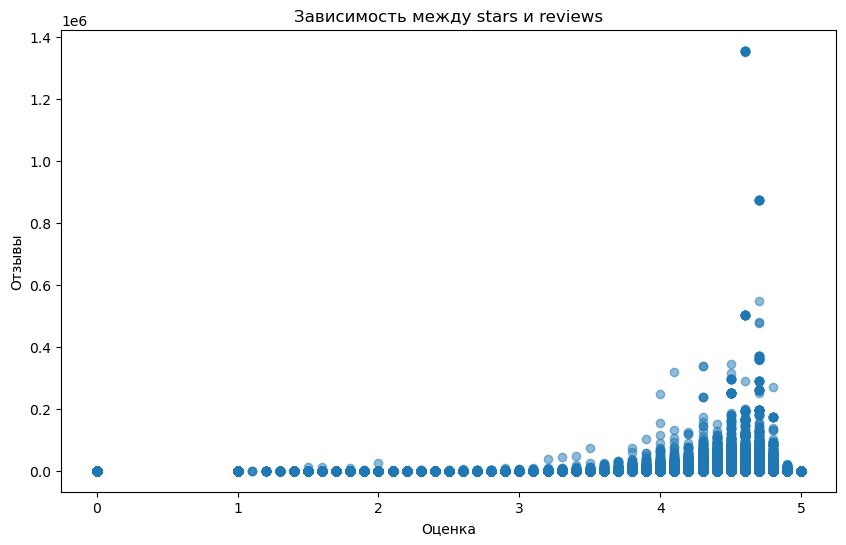

In [19]:
import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(10, 6))

# Задаем данные для осей x и y
y = df_without['reviews']
x = df_without['stars']

# Строим график
plt.scatter(x, y, alpha=0.5)

# Добавляем заголовок и метки к осям
plt.title('Зависимость между stars и reviews')
plt.ylabel('Отзывы')
plt.xlabel('Оценка')

# Отображаем график
plt.show()

Действительно, продукты с низкими оценками имеют маленькое число отзывов, в то же время, при увеличении количества отзывов у товара повышаются шансы на более высокую оценку.